We study the behaviour of European call option Greeks (Delta, Gamma, Vega) with respect to changes in underlying price, volatility and time to maturity. Graphs are based on the Black-Scholes model. We give intuitive explanations of each graph. 

In [51]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

In [11]:
#setting up parameters for the BS framework
s0=100
k=100
tau_list = [1/12, 3/12, 6/12]
sigma_list = [0.1, 0.2, 0.3]
sigma = 0.2
r = 0

In [20]:
def vega(s0, k, T, sigma, r):
    """calculating the vega of european call in the Black-Scholes settings"""
    d_plus = (1/(sigma*np.sqrt(T)))*(np.log((np.exp(r*T)*s0)/k) + 0.5*(sigma**2)*T)
    vega_c = s0*np.sqrt(T)*norm.pdf(d_plus)
    return vega_c

In [21]:
def delta(s0, k, T, sigma, r):
    """calculating the delta of european call in the Black-Scholes settings"""
    d_plus = (1/(sigma*np.sqrt(T)))*(np.log((np.exp(r*T)*s0)/k) + 0.5*(sigma**2)*T)
    delta = norm.cdf(d_plus)
    return delta

In [29]:
def gamma(s0, k, T, sigma, r):
    """calculating the gamma of european call in the Black-Scholes settings"""
    d_plus = (1/(sigma*np.sqrt(T)))*(np.log((np.exp(r*T)*s0)/k) + 0.5*(sigma**2)*T)
    gamma = norm.pdf(d_plus)/(sigma*s0*np.sqrt(T))
    return gamma

In [23]:
def theta(s0, k, T, sigma, r):
    """calculating the gamma of european call in the Black-Scholes settings"""
    d_plus = (1/(sigma*np.sqrt(T)))*(np.log((np.exp(r*T)*s0)/k) + 0.5*(sigma**2)*T)
    d_minus = (1/(sigma*np.sqrt(T)))*(np.log((np.exp(r*T)*s0)/k) - 0.5*(sigma**2)*T)
    theta = s0*norm.cdf(d_plus) - r*np.exp(-r*T)*K*norm.cdf(d_minus) - sigma*s0*norm.pdf(d_plus)/(2*np.sqrt(T))
    return theta

### Delta with respect to time to maturity 

In [37]:
price_range = [price for price in range(s0-30, s0+30, 1)]

delta_t1 = np.zeros(len(price_range))
delta_t2 = np.zeros(len(price_range))
delta_t3 = np.zeros(len(price_range))

for i in range(len(tau_list)):
    if i==0:
        for j in range(len(price_range)):
            delta_t1[j] = delta(price_range[j],k,tau_list[i], sigma, r)
    if i==1:
        for j in range(len(price_range)):
            delta_t2[j] = delta(price_range[j],k,tau_list[i], sigma, r)
    if i==2:
        for j in range(len(price_range)):
            delta_t3[j] = delta(price_range[j],k,tau_list[i], sigma, r)

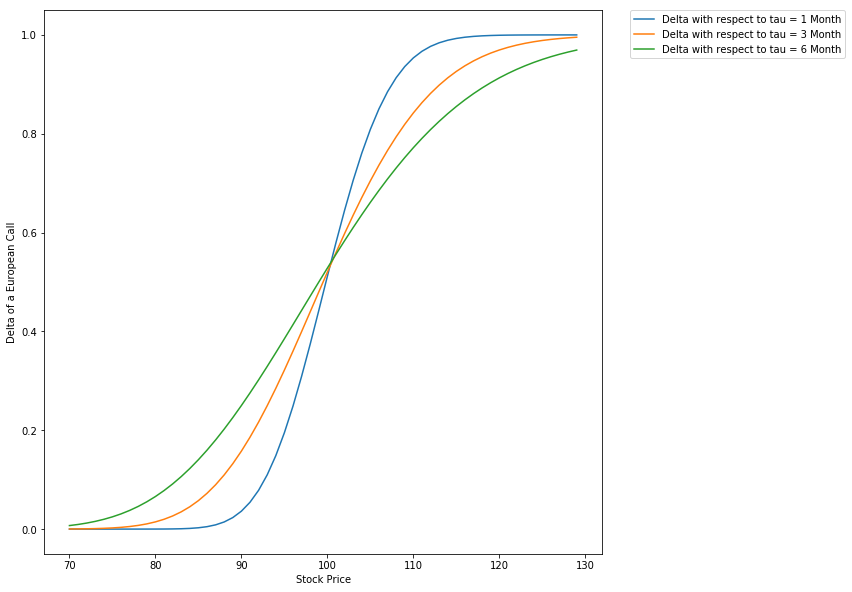

In [38]:
plt.figure(figsize=(10,10))
plt.plot(price_range, delta_t1, label="Delta with respect to tau = 1 Month")
plt.plot(price_range, delta_t2, label="Delta with respect to tau = 3 Month")
plt.plot(price_range, delta_t3, label="Delta with respect to tau = 6 Month")
plt.xlabel('Stock Price')
plt.ylabel('Delta of a European Call')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

##### Delta of a European call option can take values between $0$ and $1$. It reaches the value $1$ when it is deep INM and $0$ when it is OTM. In between it is increasing. The shorter the maturity, the quicker the transition between $0$ and $1$. 

The delta as a function of underlying $S_0$ is essentially an average of the derivative of the payoff. The latter is the step function with values $0$ below the strike and $1$ above. As such, it is natural that its average, i.e. delta, produces values between $0$ and $1$. Moreover, as time to maturity approaches $0$, the average narrows around $S_0$ and the graph of delta converges to a step function. This is easiest to see if one uses the Bachelier model (which is sufficient for an intuitive understanding). 

Since Gamma is the derivative of delta with respect to the underlying price, it is clear that it will reach it maximum at the strike and as the time to maturity goes to $0$, it will converge to a Dirac function. 

### Vega with respect to time to maturity 

In [45]:
price_range = [price for price in range(s0-30, s0+30, 1)]

vega_t1 = np.zeros(len(price_range))
vega_t2 = np.zeros(len(price_range))
vega_t3 = np.zeros(len(price_range))

for i in range(len(tau_list)):
    if i==0:
        for j in range(len(price_range)):
            vega_t1[j] = vega(price_range[j],k,tau_list[i], sigma, r)
    if i==1:
        for j in range(len(price_range)):
            vega_t2[j] = vega(price_range[j],k,tau_list[i], sigma, r)
    if i==2:
        for j in range(len(price_range)):
            vega_t3[j] = vega(price_range[j],k,tau_list[i], sigma, r)

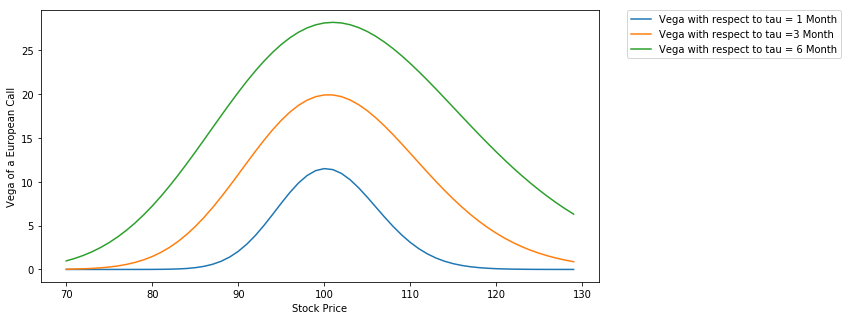

In [49]:
plt.figure(figsize=(10,5))
plt.plot(price_range, vega_t1, label="Vega with respect to tau = 1 Month")
plt.plot(price_range, vega_t2, label="Vega with respect to tau =3 Month")
plt.plot(price_range, vega_t3, label="Vega with respect to tau = 6 Month")
plt.xlabel('Stock Price')
plt.ylabel('Vega of a European Call')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

In order to estimate vega, we need to understand the change in payoffs: $P(S_0, \sigma + d\sigma) - P(S_0, \sigma)$ over a small increase $d\sigma$ of volatility. 

For simplicity imagine that we work under Bachelier model and that we estimate the payoff $P$ by a hundred brownian motions lunching at $S_0$. The way we construct Brownian motion paths is that we simulate 50 and then take the inverse them, hence $50$ of them will have final value above $S_0$ (call these trajectories "winners") and half of them below (call these "loosers"). 
As $\sigma$ increases to $\sigma + d\sigma$, the final values of winners increase, while those of loosers decrease correspondingly. 

#### Why vega is positive and has a bell shape?

Throughout the explanation below, keep in mind that only those trajectories that have final value INM contribute to the payoff. 

OTM: If $S_0 << K$ then only very few trajectories contribute to $P(S_0, \sigma)$, namely those whose final value is well above $S_0$. These are all winners, and as explained above, when $\sigma$ increases, the final values of these trajectories also increase. Thus, the payoff increases with $\sigma$, and vega is positive. However, since only very few winners contribute to the change of payoff, vega is small. 

INM: If $S_0 >> K$ then most of trajectories finish above $K$. As $\sigma$ increases, the gain in payoff generated by the winners is mostly compensated by the loss generated by the loosers. There are however a few loosers whose final values are below $K$, who do not contribute to the change in payoff, but whose corresponding winning trajectories do contribute positively to the change in payoff. Thus, the payoff increases slightly, and vega is positive but small. 

ATM: When $S_0 = K$ all winners contribute to the payoff, but none of the loosers do. As such, when $\sigma$ increases, all the increase of the winners is integrated in the payoff change, but none of the decrease of the loosers. Thus, the payoff increases by a significant amount, and vega is positive and large.   

#### How vega changes with respect to time to maturity?

As time to maturity increases, the variance of final values of trajectories above increases. As such, the winners win by much more and the losers loose by much more. Therefore, based on the above, vega keeps the same type of shape, but increases as time to maturity increases. 

### Delta and Gamma with respect to volatility 

In [40]:
price_range = [price for price in range(s0-50, s0+50, 1)]

gamma_v1 = np.zeros(len(price_range))
gamma_v2 = np.zeros(len(price_range))
gamma_v3 = np.zeros(len(price_range))

delta_v1 = np.zeros(len(price_range))
delta_v2 = np.zeros(len(price_range))
delta_v3 = np.zeros(len(price_range))

for i in range(len(tau_list)):
    if i==0:
        for j in range(len(price_range)):
            delta_v1[j] = delta(price_range[j],k,tau_list[2], sigma_list[0], r)
            gamma_v1[j] = gamma(price_range[j],k,tau_list[2], sigma_list[0], r)
    if i==1:
        for j in range(len(price_range)):
            delta_v2[j] = delta(price_range[j],k,tau_list[2], sigma_list[1], r)
            gamma_v2[j] = gamma(price_range[j],k,tau_list[2], sigma_list[1], r)
    if i==2:
        for j in range(len(price_range)):
            delta_v3[j] = delta(price_range[j],k,tau_list[2], sigma_list[2], r)
            gamma_v3[j] = gamma(price_range[j],k,tau_list[2], sigma_list[2], r)

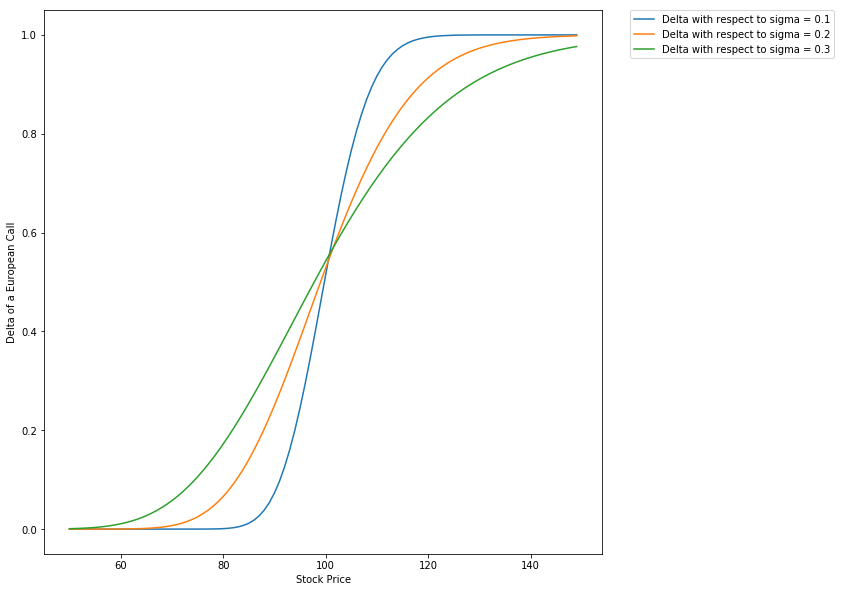

In [41]:
plt.figure(figsize=(10,10))
plt.plot(price_range, delta_v1, label="Delta with respect to sigma = 0.1")
plt.plot(price_range, delta_v2, label="Delta with respect to sigma = 0.2")
plt.plot(price_range, delta_v3, label="Delta with respect to sigma = 0.3")
plt.xlabel('Stock Price')
plt.ylabel('Delta of a European Call')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

For the shape of each curve, see the explanation above. Note, that increase in volatility is semi-equivalent to increase in time to maturity. 

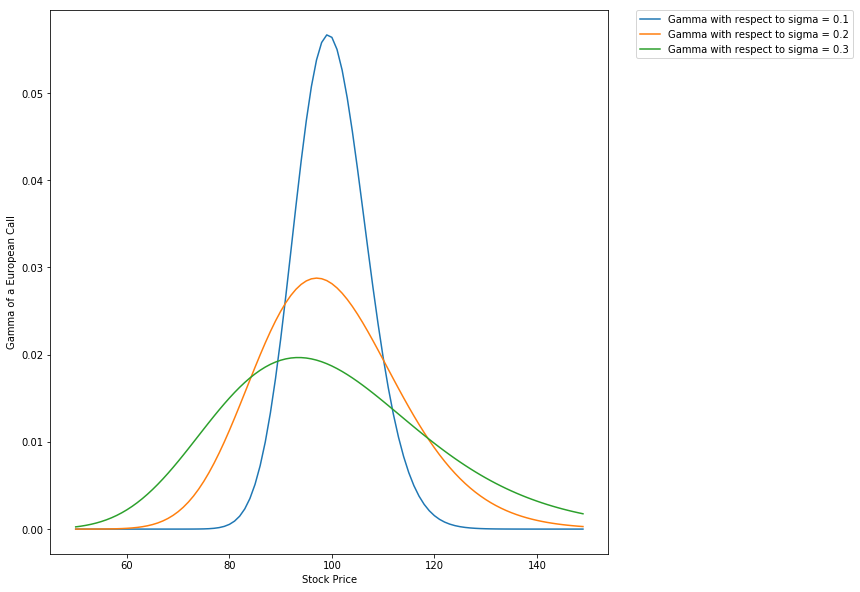

In [33]:
plt.figure(figsize=(10,10))
plt.plot(price_range, gamma_v1, label="Gamma with respect to sigma = 0.1")
plt.plot(price_range, gamma_v2, label="Gamma with respect to sigma = 0.2")
plt.plot(price_range, gamma_v3, label="Gamma with respect to sigma = 0.3")
plt.xlabel('Stock Price')
plt.ylabel('Gamma of a European Call')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

Similar to the explanation for Gamma in terms of time to maturity. Observe that area under each of the curves is $1$ as Gamma is the derivative of a function that increase from $0$ to $1$. The increase of Delta becomes steeper around $K$ as sigma decreases, and therefore Gamma spikes at $K$. 